# Problem Set 2
## *James Katz*

-----------------

## Studying the Galaxy with Globular Clusters

Download the list of (real!) data for globular clusters, “gc.dat.txt” which gives: 
* angular coordinates of each cluster in galactic coordinates $(l,b)$
* distance from the Sun, R, in kilo-parsecs
* metallicity of the globular cluster, [Fe/H]. If [Fe/H] = 999, means there is no measurement.
* observed radial velocity of the cluster $V_r$ in km/s. ($V_r$ = 999) means no measurement
Note that the angular Galactic coordinates ( ) are the angular position measured from our
viewing position at the Sun. You will need to transform the observed data to cartesian
coordinates (X,Y,Z) where +X points toward the Galactic center (l=0), +Y points in the direction
of rotation (l=90), and +Z points above the plane (b>0). Defined this way, we have
* $X = Rcos(l)cos(b)$
* $Y = Rsin(l)cos(b)$
* $Z = Rsin(b)$
Be careful with trig functions when coding! numpy trig functions assume angles are given in
radians, not degrees. But the data file lists angles in degrees, so you must convert. So
Z=R*np.sin(b) would be incorrect, but Z=R*np.sin(np.radians(b)) will work.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('gc.dat.txt',sep=r"\s{2,}")
df = df.drop(['vr'],axis=1)
df = df.drop(0,axis = 0)
df.columns = ['l','b','r','feh','vr']
df['l'].head(50)

C:\Users\James\AppData\Local\Temp\ipykernel_10428\2964134693.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('gc.dat.txt',sep=r"\s{2,}")


1     305.9
2     152.3
3     301.5
4     270.5
5     130.1
6     258.4
7     218.1
8     170.5
9     244.5
10    227.2
11    245.6
12    180.4
13    261.3
14    282.2
15    292.3
16    240.1
17    277.2
18    202.3
19    252.9
20      301
21    300.9
22    299.6
23    303.6
24      333
25    335.7
26    309.1
27    42.21
28    311.6
29    320.1
30    42.15
31    342.2
32    331.1
33    307.3
34    332.5
35     0.85
36    342.9
37     3.86
38    326.6
39    327.6
40    328.4
41      337
42    328.8
43    28.75
44    352.7
45      351
46    317.7
47    351.9
48    342.4
49    345.1
50     3.37
Name: l, dtype: object

1. Calculate and plot the X,Y,Z positions to get a feel for the distribution of globular clusters in the Galaxy. Plot the X-Y and X-Z projections so that you can see how things are distributed along each axis. 

a. make X-Y and X-Z plots for the metal-poor global clusters with [Fe/H]<-0.8

b. Make the same plot for the metal-rich globular clusters with [Fe/H] > -0.8

c. Explain how the two distributions are different.


In [4]:
df['l_rad'] = df['l'].astype(float) * np.pi /180
df['b_rad'] = df['b'].astype(float) * np.pi /180
df['X'] = df['r']*np.cos(df['l'].astype(float))*np.cos(df['b'].astype(float))
df['Y'] = df['r']*np.sin(df['l'].astype(float))*np.cos(df['b'].astype(float))
df['Z'] = df['r']*np.cos(df['b'].astype(float))
df.head()

,l,b,r,feh,vr,l_rad,b_rad,X,Y,Z
1,305.9,-44.89,4.3,-0.76,-18.7,5.338962,-0.783478,-1.043618,-2.432475,2.646898
2,152.3,-89.38,8.1,-1.24,-46.6,2.658136,-1.559975,0.084234,1.250772,1.253605
3,301.5,-46.25,8.3,-1.16,223.5,5.262168,-0.807215,-5.304374,0.494171,-5.327343
4,270.5,-52.13,16.0,-1.35,68.2,4.721116,-0.909840,-4.392665,-1.470478,-4.632257
5,130.1,19.03,9.7,-0.80,999.0,2.270673,0.332136,-2.601296,-9.181110,9.542512


In [5]:
df_lessthan = df[(df['feh']<-0.8)]
df_greaterthan = df[(df['feh']>-0.8) & (df['feh']!=999.00)]

print(df_lessthan.size)
df_lessthan.head()


1050


,l,b,r,feh,vr,l_rad,b_rad,X,Y,Z
2,152.3,-89.38,8.1,-1.24,-46.6,2.658136,-1.559975,0.084234,1.250772,1.253605
3,301.5,-46.25,8.3,-1.16,223.5,5.262168,-0.807215,-5.304374,0.494171,-5.327343
4,270.5,-52.13,16.0,-1.35,68.2,4.721116,-0.909840,-4.392665,-1.470478,-4.632257
6,258.4,-48.47,119.1,-1.80,116.0,4.509931,-0.845961,-18.688167,-18.838434,-26.535527
7,218.1,-41.33,80.8,-1.46,-23.6,3.806563,-0.721345,17.000533,69.263408,-71.319267


In [6]:
print(df_greaterthan.size)
df_greaterthan.head()

320


,l,b,r,feh,vr,l_rad,b_rad,X,Y,Z
1,305.9,-44.89,4.3,-0.76,-18.7,5.338962,-0.783478,-1.043618,-2.432475,2.646898
38,326.6,4.86,7.4,-0.37,-115.7,5.700245,0.084823,1.079781,-0.136378,1.088359
42,328.8,-2.79,7.0,-0.62,8.0,5.738643,-0.048695,3.171234,-5.756000,-6.571778
57,347.8,3.31,9.3,-0.70,999.0,6.070255,0.057770,5.577847,-7.276522,-9.168433
64,355.8,5.38,6.0,-0.59,-107.3,6.209881,0.093899,-2.587955,-2.664819,3.714670


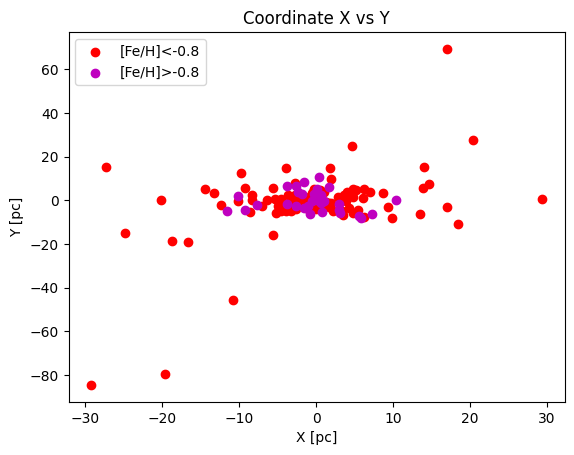

In [7]:
plt.scatter(df_lessthan['X'],df_lessthan['Y'],color='r',label='[Fe/H]<-0.8')
plt.scatter(df_greaterthan['X'],df_greaterthan['Y'],color='m',label='[Fe/H]>-0.8')
plt.title('Coordinate X vs Y')
plt.xlabel('X [pc]')
plt.ylabel('Y [pc]')
plt.legend()
plt.show()

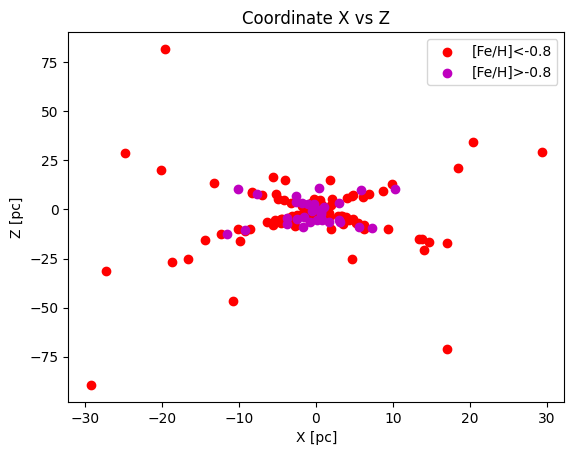

In [8]:
plt.scatter(df_lessthan['X'],df_lessthan['Z'],color='r',label='[Fe/H]<-0.8')
plt.scatter(df_greaterthan['X'],df_greaterthan['Z'],color='m',label='[Fe/H]>-0.8')
plt.title('Coordinate X vs Z')
plt.xlabel('X [pc]')
plt.ylabel('Z [pc]')
plt.legend()
plt.show()

### How these distributions are different:

The X-Y axis gives us an overview head of our galaxy, centered at the sun.  The X-Z axis gives us a cross-section view of our galaxy, centered at the sun.

---------------------

2. Now, in the 1910s, Harlow Shapley derived the distance to the Galactic Center by using the positions of the globular clusters. Now it's your turn:

a. What is the (X,Y,Z) center of the metal-poor globular cluster system? How far, then, is
the Galactic Center?

b. What is the (X,Y,Z) center of the metal-rich globular cluster system? How far, then, is the
Galactic Center?

c. Which of these two measurements do you expect is more accurate? Why?

In [33]:
pos_av_low_X = sum(df_lessthan['X'])/df_lessthan['X'].size
pos_av_low_Y = sum(df_lessthan['Y'])/df_lessthan['Y'].size
pos_av_low_Z = sum(df_lessthan['Z'])/df_lessthan['Z'].size

pos_av_high_X = sum(df_greaterthan['X'])/df_greaterthan['X'].size
pos_av_high_Y = sum(df_greaterthan['Y'])/df_greaterthan['Y'].size
pos_av_high_Z = sum(df_greaterthan['Z'])/df_greaterthan['Z'].size

print('The center of the low-metallicity globular clusters is X=',pos_av_low_X,'Y=',pos_av_low_Y,'Z=',pos_av_low_Z,'.')
print('The center of the high-metallicity globular clusters is X=',pos_av_high_X,'Y=',pos_av_high_Y,'Z=',pos_av_high_Z,'.')

r_low = np.sqrt(pos_av_low_X**2+pos_av_low_Y**2+pos_av_low_Z**2)
print('Low-metallicity clusters give a distance of ',r_low,'kiloparsecs from the galactic center to the sun.')

r_high = np.sqrt(pos_av_high_X**2+pos_av_high_Y**2+pos_av_high_Z**2)
print('High-metallicity clusters give a distance of ',r_high,'kiloparsecs from the galactic center to the sun.')

The center of the low-metallicity globular clusters is X= -0.7160955226488761 Y= -0.8757228316832258 Z= -2.471512722728198 .
The center of the high-metallicity globular clusters is X= -0.5160735037494624 Y= -0.303029628100699 Z= -1.1759643374558504 .
Low-metallicity clusters give a distance of  2.718098308394383 kiloparsecs from the galactic center to the sun.
High-metallicity clusters give a distance of  1.3194888933776865 kiloparsecs from the galactic center to the sun.


Distances from the galactic center to the sun given by both the low and high metallicity globular clusters are incorrect.  The galactic center is 8 kiloparsecs from the sun.  However, it would seem the low-metallicity globular clusters give a closer value.  This may be because the low-metallicity globular clusters are more in-form with the shape of densitity concentration of our galaxy while the high-metallicty stars are more loosly distributed.

3. Finally, we can use the observed velocities of the globular clusters to get the rotation speed of the Galaxy.

    a. Plot Vr (on the y-axis) against l (on the x-axis). Why should you use only the metal-poor
    globular clusters for this exercise? You should see a lot of dispersion, but a hint of a
    sinusoidal trend. At l=90 the radial velocities are more negative, at l=270 they are more
    positive. This is because the globular cluster system isn't rotating. Remember that l=90
    points along the direction of rotation; clusters along l=90 are in front of us and we are
    moving towards them, so they have a negative (approaching) radial velocity (and vice
    versa for the clusters at l=270).

    b. You should be able to fit a sine function to the data: $V_r = -V_{c,proj}sin(l)$. Once you have solved for         $V_{c,proj}sin(l)$, remember we have to de-project this value to get the true
    rotation speed. Since $V_{c,proj} = V_c<cos(b)>$, averaging over all b's, we have  $V_{c,proj} = (2/pi)V_c$.  Fit this sine curve to the data, and derive Vc, the circular velocity of
    the Milky Way. How does your value compare to the "standard" value of 220 km/s?

<u>Coding Hints</u>
You don’t actually have to do a sine fit of $V_r$ versus which would be a complicated non-linear
fit. Instead, fit $V_r$ versus $sin(l)$, which is a simple linear fit.



[0, 45, 90, 135, 180, 225, 270, 315, 360]


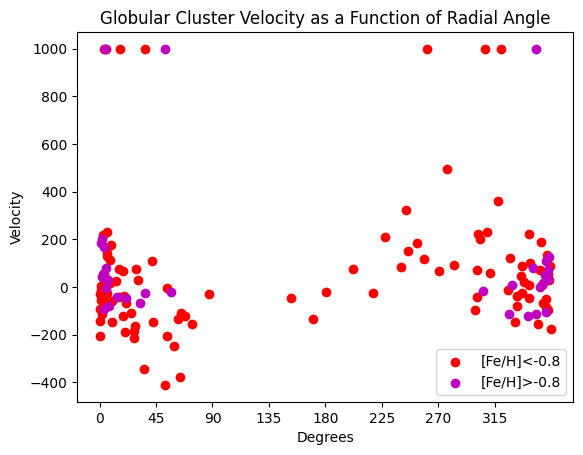

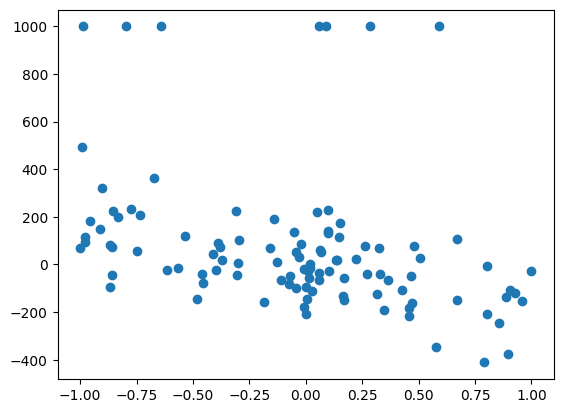

In [39]:
#ticks = [0,45,90,135,180,225,270,315,360]

x = np.arange(0, 360, 45)

print(ticks)

plt.scatter(np.asarray(df_lessthan['l'],float),df_lessthan['vr'],color='red',label='[Fe/H]<-0.8')
plt.scatter(np.asarray(df_greaterthan['l'],float),df_greaterthan['vr'],color='m',label='[Fe/H]>-0.8')
plt.title('Globular Cluster Velocity as a Function of Radial Angle')
plt.xlabel('Degrees')
plt.ylabel('Velocity')
plt.xticks(x)
plt.legend()
plt.show()

plt.scatter(np.sin(df_lessthan['l_rad']),df_lessthan['vr'])
plt.show()